## Principal Component Analysis (PCA)

In simple words, principal component analysis is a method of extracting important variables (in form of components) from a large set of variables available in a data set. It extracts low dimensional set of features from a high dimensional data set with a motive to capture as much information as possible. With fewer variables, visualization also becomes much more meaningful. PCA is more useful when dealing with 3 or higher dimensional data.

It is always performed on a symmetric correlation or covariance matrix. This means the matrix should be numeric and have standardized data.

Let’s say we have a data set of dimension 300 (n) × 50 (p). n represents the number of observations and p represents number of predictors. Since we have a large p = 50, there can be p(p-1)/2 scatter plots i.e more than 1000 plots possible to analyze the variable relationship. Wouldn’t is be a tedious job to perform exploratory analysis on this data ?

In this case, it would be a lucid approach to select a subset of p (p << 50) predictor which captures as much information. Followed by plotting the observation in the resultant low dimensional space.

![alt text](http://www.nlpca.org/fig-pca-principal-component-analysis-m.png)


**PCA transformation**

Principal component analysis (PCA) rotates the original data space such that the axes of the new coordinate system point into the directions of highest variance of the data. The axes or new variables are termed principal components (PCs) and are ordered by variance: The first component, PC 1, represents the direction of the highest variance of the data. The direction of the second component, PC 2, represents the highest of the remaining variance orthogonal to the first component. This can be naturally extended to obtain the required number of components which together span a component space covering the desired amount of variance.

Since components describe specific directions in the data space, each component depends by certain amounts on each of the original variables: Each component is a linear combination of all original variables.

**What are principal components ?**

A principal component is a normalized linear combination of the original predictors in a data set. In image above, PC1 and PC2 are the principal components. Let’s say we have a set of predictors as X¹, X²...,Xp

The principal component can be written as:

Z¹ = Φ¹¹X¹ + Φ²¹X² + Φ³¹X³ + .... +Φp¹Xp

where,

* Z¹ is first principal component
* Φp¹ is the loading vector comprising of loadings (Φ¹, Φ²..) of first principal component. The loadings are constrained to a sum of square equals to 1. This is because large magnitude of loadings may lead to large variance. It also defines the direction of the principal component (Z¹) along which data varies the most. It results in a line in p dimensional space which is closest to the n observations. Closeness is measured using average squared euclidean distance.
* X¹..Xp are normalized predictors. Normalized predictors have mean equals to zero and standard deviation equals to one.


Therefore,

First principal component is a linear combination of original predictor variables which captures the maximum variance in the data set. It determines the direction of highest variability in the data. Larger the variability captured in first component, larger the information captured by component. No other component can have variability higher than first principal component.

The first principal component results in a line which is closest to the data i.e. it minimizes the sum of squared distance between a data point and the line.

Similarly, we can compute the second principal component also.

 

Second principal component (Z²) is also a linear combination of original predictors which captures the remaining variance in the data set and is uncorrelated with Z¹. In other words, the correlation between first and second component should is zero. It can be represented as:

Z² = Φ¹²X¹ + Φ²²X² + Φ³²X³ + .... + Φp2Xp

If the two components are uncorrelated, their directions should be orthogonal (image below). This image is based on a simulated data with 2 predictors. Notice the direction of the components, as expected they are orthogonal. This suggests the correlation b/w these components in zero.


![alt text](https://miro.medium.com/max/796/1*H38t3YUv_QktLwalzDYRRg.png)

All succeeding principal component follows a similar concept i.e. they capture the remaining variation without being correlated with the previous component. In general, for n × p dimensional data, min(n-1, p) principal component can be constructed.

The directions of these components are identified in an unsupervised way i.e. the response variable(Y) is not used to determine the component direction. Therefore, it is an unsupervised approach.

**Why is normalization of variables necessary ?**

The principal components are supplied with normalized version of original predictors. This is because, the original predictors may have different scales. For example: Imagine a data set with variables’ measuring units as gallons, kilometers, light years etc. It is definite that the scale of variances in these variables will be large.

Performing PCA on un-normalized variables will lead to insanely large loadings for variables with high variance. In turn, this will lead to dependence of a principal component on the variable with high variance. This is undesirable.



In [0]:
import numpy as np
import matplotlib.pyplot as plt

(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593762,
 1.019590430670684)

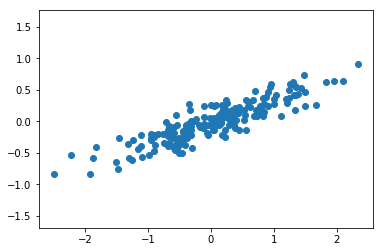

In [0]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593762,
 1.019590430670684)

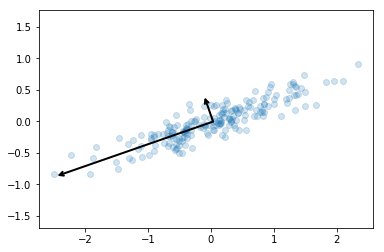

In [0]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.

In [0]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
print(X)
print(X_pca)

original shape:    (200, 2)
transformed shape: (200, 1)
[[-6.25301618e-01 -1.70063657e-01]
 [ 9.60695033e-01  5.90900597e-01]
 [-5.98543385e-01 -4.02593393e-01]
 [-2.22805938e+00 -5.32576740e-01]
 [-4.61430060e-01 -4.98867244e-01]
 [-9.58929028e-01 -2.69331024e-01]
 [-6.73079909e-01 -3.38308547e-01]
 [ 1.30501861e+00  5.91357846e-01]
 [ 3.74545597e-01 -9.85442049e-02]
 [-1.82628627e+00 -4.06170254e-01]
 [ 6.68262284e-01  3.36877396e-01]
 [-5.82646676e-01 -1.77369217e-01]
 [-4.18128976e-01 -3.73811389e-01]
 [ 1.72209371e-01  2.64668836e-01]
 [ 3.77116687e-01  1.88442969e-01]
 [-6.79396230e-01 -1.31601978e-01]
 [ 1.03148960e+00  4.25550018e-01]
 [ 3.36041799e-01  3.90982721e-02]
 [ 7.05745985e-01  4.88730649e-01]
 [ 8.39511547e-01  1.52125872e-01]
 [ 1.49882898e+00  4.71380809e-01]
 [ 2.88356638e-01  3.31334714e-02]
 [-5.02935011e-01 -3.68665426e-01]
 [ 1.47921067e+00  7.40445724e-01]
 [-4.44382429e-01 -1.65019364e-01]
 [-5.33464228e-01 -6.02221911e-02]
 [-6.16229422e-01 -2.11783922e-01]

(-2.771528780690219, 2.661757596590678, -0.9964674432667128, 1.021908177590081)

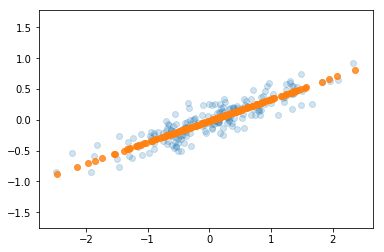

In [0]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

The light blue points are the original data, while the orange points are the projected version. This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [0]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


In [0]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [0]:
projected

array([[ -1.25946677,  21.27488087],
       [  7.9576096 , -20.76870288],
       [  6.99192432,  -9.95598207],
       ...,
       [ 10.80128399,  -6.96024908],
       [ -4.87209988,  12.42393698],
       [ -0.34438786,   6.36555528]])

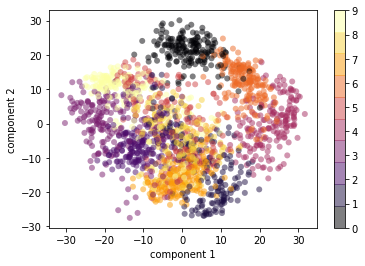

In [0]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('inferno', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

What do the components mean?
We can go a bit further here, and begin to ask what the reduced dimensions mean. This meaning can be understood in terms of combinations of basis vectors. For example, each image in the training set is defined by a collection of 64 pixel values, which we will call the vector $x$:

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$
One way we can think about this is in terms of a pixel basis. That is, to construct the image, we multiply each element of the vector by the pixel it describes, and then add the results together to build the image:

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$
One way we might imagine reducing the dimension of this data is to zero out all but a few of these basis vectors. For example, if we use only the first eight pixels, we get an eight-dimensional projection of the data, but it is not very reflective of the whole image: we've thrown out nearly 90% of the pixels!

![alt text](https://github.com/jakevdp/PythonDataScienceHandbook/raw/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/figures/05.09-digits-pixel-components.png)

The upper row of panels shows the individual pixels, and the lower row shows the cumulative contribution of these pixels to the construction of the image. Using only eight of the pixel-basis components, we can only construct a small portion of the 64-pixel image. Were we to continue this sequence and use all 64 pixels, we would recover the original image.

But the pixel-wise representation is not the only choice of basis. We can also use other basis functions, which each contain some pre-defined contribution from each pixel, and write something like

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$
PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset. The principal components, which act as the low-dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series.

![alt text](https://github.com/jakevdp/PythonDataScienceHandbook/raw/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/figures/05.09-digits-pca-components.png)

Unlike the pixel basis, the PCA basis allows us to recover the salient features of the input image with just a mean plus eight components! The amount of each pixel in each component is the corollary of the orientation of the vector in our two-dimensional example. This is the sense in which PCA provides a low-dimensional representation of the data: it discovers a set of basis functions that are more efficient than the native pixel-basis of the input data.

[1.48905936e-01 1.36187712e-01 1.17945938e-01 8.40997942e-02
 5.78241466e-02 4.91691032e-02 4.31598701e-02 3.66137258e-02
 3.35324810e-02 3.07880621e-02 2.37234084e-02 2.27269657e-02
 1.82186331e-02 1.77385494e-02 1.46710109e-02 1.40971560e-02
 1.31858920e-02 1.24813782e-02 1.01771796e-02 9.05617439e-03
 8.89538461e-03 7.97123157e-03 7.67493255e-03 7.22903569e-03
 6.95888851e-03 5.96081458e-03 5.75614688e-03 5.15157582e-03
 4.89539777e-03 4.28887968e-03 3.73606048e-03 3.53274223e-03
 3.36683986e-03 3.28029851e-03 3.08320884e-03 2.93778629e-03
 2.56588609e-03 2.27742397e-03 2.22277922e-03 2.11430393e-03
 1.89909062e-03 1.58652907e-03 1.51159934e-03 1.40578764e-03
 1.16622290e-03 1.07492521e-03 9.64053065e-04 7.74630271e-04
 5.57211553e-04 4.04330693e-04 2.09916327e-04 8.24797098e-05
 5.25149980e-05 5.05243719e-05 3.29961363e-05 1.24365445e-05
 7.04827911e-06 3.01432139e-06 1.06230800e-06 5.50074587e-07
 3.42905702e-07 9.50687638e-34 9.50687638e-34 9.36179501e-34]


Text(0, 0.5, 'cumulative explained variance')

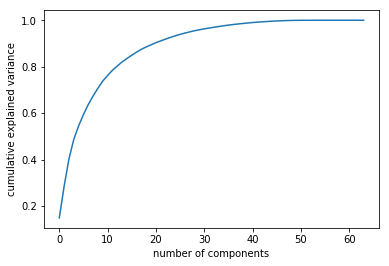

In [0]:
pca = PCA().fit(digits.data)
print(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

PCA's main weakness is that it tends to be highly affected by outliers in the data. For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components. Scikit-Learn contains a couple interesting variants on PCA, including RandomizedPCA and SparsePCA, both also in the sklearn.decomposition submodule. RandomizedPCA uses a non-deterministic method to quickly approximate the first few principal components in very high-dimensional data, while SparsePCA introduces a regularization term that serves to enforce sparsity of the components.